In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML


In [2]:
ff_df = pd.read_csv('ff/fill_factor.csv')
x = list(ff_df["ff"])
before = list(ff_df["before"])
after = list(ff_df["after"])

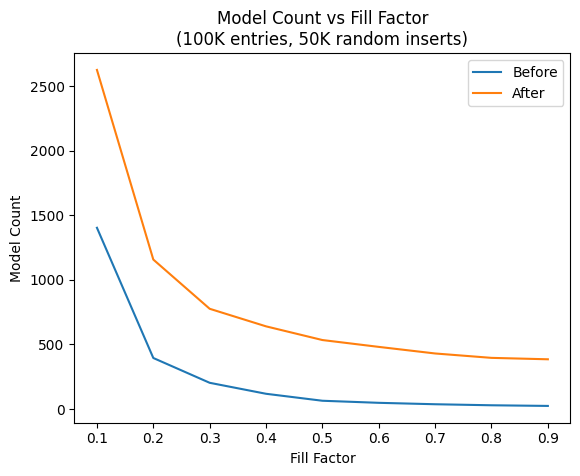

In [3]:
# Plot all of these using matplotlib
plt.plot(x, before, label="Before")
plt.plot(x, after, label="After")
plt.xlabel("Fill Factor")
plt.ylabel("Model Count")
plt.title("Model Count vs Fill Factor\n(100K entries, 50K random inserts)")
plt.legend()
plt.show()

In [4]:
inserts_df = pd.read_csv('inserts/inserts_vs_segsize.csv')

x = np.array(inserts_df["num_inserts"].unique())
in_place_y = np.array(inserts_df[inserts_df["type"] == "in_place"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])
out_of_place_y = np.array(inserts_df[inserts_df["type"] == "out_of_place"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])

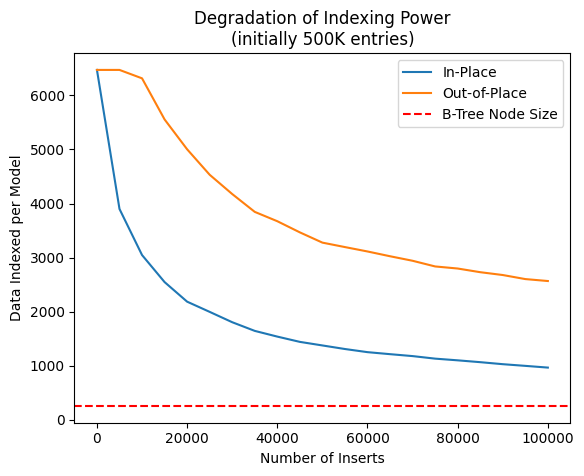

In [5]:
# Plot using matplotlib
plt.plot(x, in_place_y, label="In-Place")
plt.plot(x, out_of_place_y, label="Out-of-Place")
plt.xlabel("Number of Inserts")
plt.ylabel("Data Indexed per Model")
plt.title("Degradation of Indexing Power\n(initially 500K entries)")
# Draw a line at y = 128
plt.axhline(y=64 * 4, color='r', linestyle='--', label="B-Tree Node Size")
plt.legend()
plt.show()


In [6]:
inserts_vs_baseline_df = pd.read_csv('inserts/inserts_vs_baseline.csv')

x = np.array(inserts_vs_baseline_df["num_inserts"].unique())
in_place_y = np.array(inserts_vs_baseline_df[inserts_vs_baseline_df["type"] == "in_place"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])
out_of_place_y = np.array(inserts_vs_baseline_df[inserts_vs_baseline_df["type"] == "out_of_place"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])
baseline_y = np.array(inserts_vs_baseline_df[inserts_vs_baseline_df["type"] == "baseline"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])
baseline_y[0] = in_place_y[0]

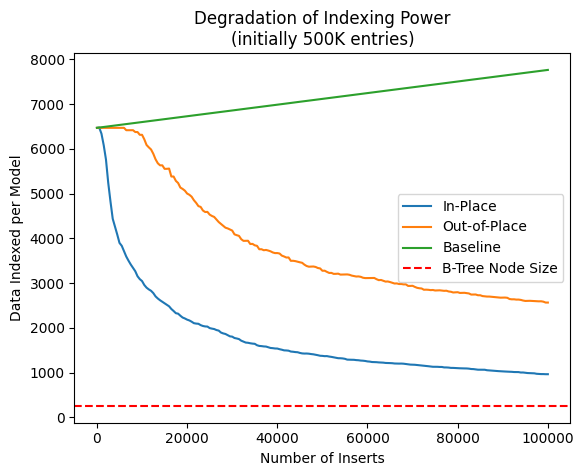

In [7]:
# Plot using matplotlib
plt.plot(x, in_place_y, label="In-Place")
plt.plot(x, out_of_place_y, label="Out-of-Place")
plt.plot(x, baseline_y, label="Baseline")
plt.xlabel("Number of Inserts")
plt.ylabel("Data Indexed per Model")
plt.title("Degradation of Indexing Power\n(initially 500K entries)")
# Draw a line at y = 128
plt.axhline(y=64 * 4, color='r', linestyle='--', label="B-Tree Node Size")
plt.legend()
plt.show()


In [8]:
ivb_neight = pd.read_csv('inserts/inserts_vs_baseline_neighbor.csv')

x = np.array(ivb_neight["num_inserts"].unique())
in_place_y = np.array(ivb_neight[inserts_vs_baseline_df["type"] == "in_place"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])
out_of_place_y = np.array(ivb_neight[inserts_vs_baseline_df["type"] == "out_of_place"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])
baseline_y = np.array(ivb_neight[inserts_vs_baseline_df["type"] == "baseline"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])
baseline_y[0] = in_place_y[0]

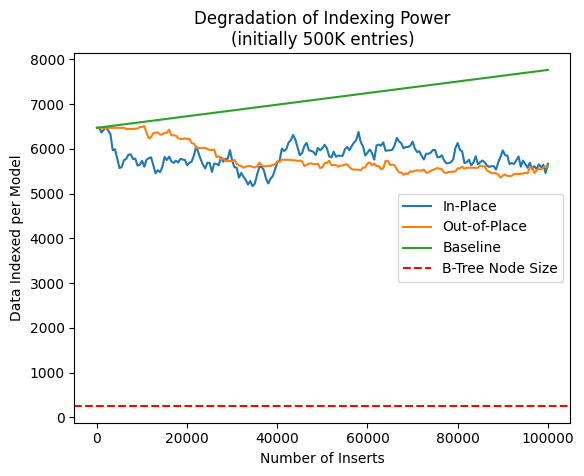

In [9]:
# Plot using matplotlib
plt.plot(x, in_place_y, label="In-Place")
plt.plot(x, out_of_place_y, label="Out-of-Place")
plt.plot(x, baseline_y, label="Baseline")
plt.xlabel("Number of Inserts")
plt.ylabel("Data Indexed per Model")
plt.title("Degradation of Indexing Power\n(initially 500K entries)")
# Draw a line at y = 128
plt.axhline(y=64 * 4, color='r', linestyle='--', label="B-Tree Node Size")
plt.legend()
plt.show()


In [12]:
neigh_vs_size_df = pd.read_csv('inserts/neighbors_vs_size.csv')

x = np.array(neigh_vs_size_df["num_inserts"].unique())

neighs = neigh_vs_size_df["neighbors"].unique()
ys = []
for n in neighs:
    name = "neighbors = " + str(n)
    data = np.array(neigh_vs_size_df[neigh_vs_size_df["neighbors"] == n].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["seg_size"])
    ys.append((name, data))

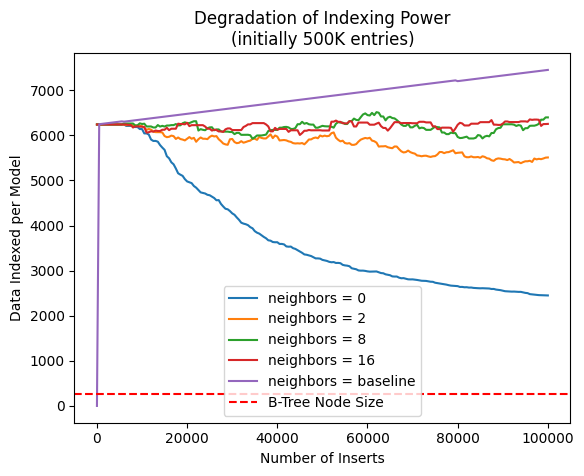

In [13]:
# Plot using matplotlib
for (name, data) in ys:
    plt.plot(x, data, label=name)
plt.xlabel("Number of Inserts")
plt.ylabel("Data Indexed per Model")
plt.title("Degradation of Indexing Power\n(initially 500K entries)")
# Draw a line at y = 128
plt.axhline(y=64 * 4, color='r', linestyle='--', label="B-Tree Node Size")
plt.legend()
plt.show()


In [15]:
neigh_vs_time_df = pd.read_csv('inserts/neighbors_vs_time.csv')

x = np.array(neigh_vs_time_df["initial_size"].unique())

types = neigh_vs_time_df["type"].unique()
neighs = neigh_vs_time_df["neighbors"].unique()
ys = []

for t in types:
    for n in neighs:
        name = t + " neighbors = " + str(n)
        data = np.array(neigh_vs_time_df[(neigh_vs_time_df["neighbors"] == n) & (neigh_vs_time_df["type"] == t)].groupby("initial_size").mean(numeric_only=True).sort_values(by="initial_size")["time"])
        ys.append((name, data))

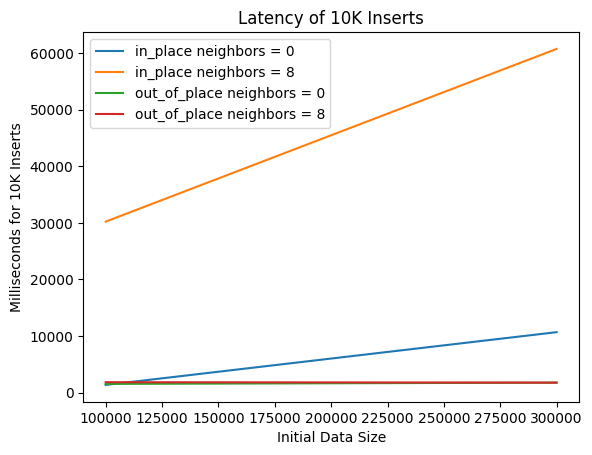

In [17]:
# Plot using matplotlib
for (name, data) in ys:
    plt.plot(x, data, label=name)
plt.xlabel("Initial Data Size")
plt.ylabel("Milliseconds for 10K Inserts")
plt.title("Latency of 10K Inserts")
plt.legend()
plt.show()


In [6]:
hist_df = pd.read_csv('inserts/hist_inserts_vs_segsize.csv', index_col=False)
x = np.array(hist_df["num_inserts"].unique())
x.sort()

y_in_place = hist_df[hist_df["type"] == "in_place"].sort_values(by="num_inserts")
y_out_of_place = hist_df[hist_df["type"] == "out_of_place"].sort_values(by="num_inserts")

/var/folders/gg/70980zzd0lq3gkyk7923jx8c0000gq/T/ipykernel_68592/1481834682.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  hist_df = pd.read_csv('inserts/hist_inserts_vs_segsize.csv', index_col=False)


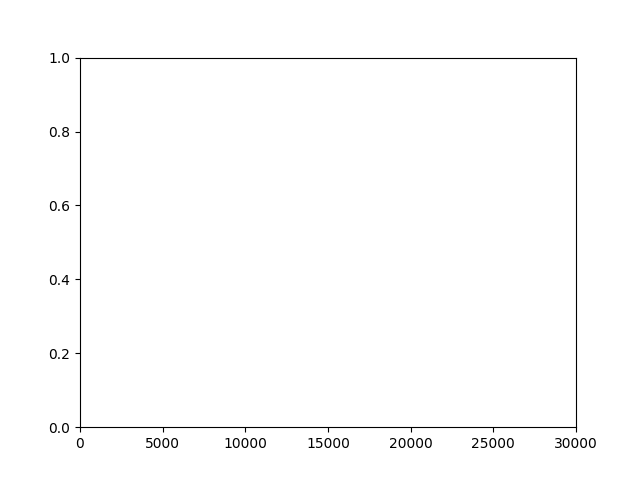

In [7]:
%matplotlib widget
fig, ax = plt.subplots()
ax.set_xlim((0, 30000))

# Replace "nodes" with "models"
# Replace "node size" with "data (num entries) indexed per model"

# Function to update the histogram
def update_hist(num):
    ax.clear()
    nbins = 50
    num_inserts = f"{int(list(y_in_place.iloc[num].values)[2] / 1000)}K"
    data = list(y_in_place.iloc[num].values)[4:]
    real_data = []
    for bin in range(nbins):
        for _ in range(data[bin]):
            real_data.append(bin)
    n, bins, patches = ax.hist(real_data, alpha=0.5, bins=10)
    max_occ = max(data)
    max_ytick = max_occ
    num_yticks = 8
    while max_ytick % 25 != 0:
        max_ytick += 1
    ax.set_yticks([int((val + 0.0) / num_yticks * max_ytick) for val in range(num_yticks + 1)])
    ax.set_xticks([0, 4, 8, 12, 16, 20])
    hist_max = 12000
    ax.set_xticklabels([int(val / 5 * hist_max) for val in range(6)])
    ax.set_xlabel("Data Indexed Per Model")
    ax.set_ylabel("Number of Models")
    ax.set_title("In-Place\n(1M entries, 100K inserts)")
    # Write the number of inserts
    ax.text(0.5, 0.9, "Number of Inserts: {}".format(num_inserts), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
    return patches

# Create the animation
ani = animation.FuncAnimation(fig, update_hist, frames=100, blit=True)

plt.show()

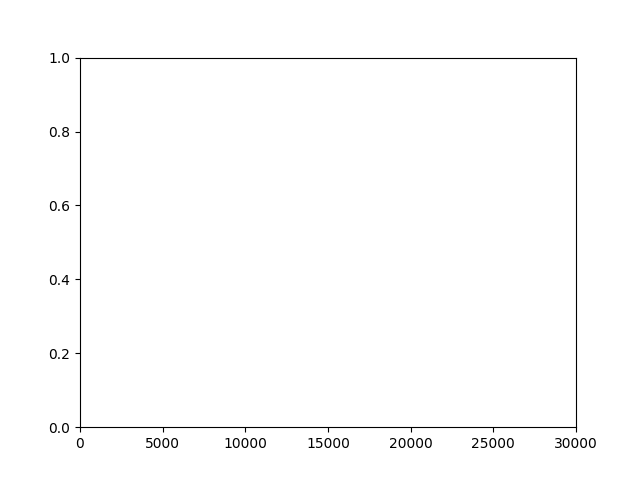

In [7]:
%matplotlib widget
fig, ax = plt.subplots()
ax.set_xlim((0, 30000))

# Replace "nodes" with "models"
# Replace "node size" with "data (num entries) indexed per model"

# Function to update the histogram
def update_hist(num):
    ax.clear()
    nbins = 50
    num_inserts = f"{int(list(y_out_of_place.iloc[num].values)[2] / 1000)}K"
    data = list(y_out_of_place.iloc[num].values)[4:]
    real_data = []
    for bin in range(nbins):
        for _ in range(data[bin]):
            real_data.append(bin)
    n, bins, patches = ax.hist(real_data, alpha=0.5, bins=10)
    max_occ = max(data)
    max_ytick = max_occ
    num_yticks = 8
    while max_ytick % 25 != 0:
        max_ytick += 1
    ax.set_yticks([int((val + 0.0) / num_yticks * max_ytick) for val in range(num_yticks + 1)])
    ax.set_xticks([0, 4, 8, 12, 16, 20])
    hist_max = 12000
    ax.set_xticklabels([int(val / 5 * hist_max) for val in range(6)])
    ax.set_xlabel("Data Indexed Per Model")
    ax.set_ylabel("Number of Models")
    ax.set_title("Out-of-Place\n(1M entries, 100K inserts)")
    # Write the number of inserts
    ax.text(0.5, 0.9, "Number of Inserts: {}".format(num_inserts), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
    return patches

# Create the animation
ani = animation.FuncAnimation(fig, update_hist, frames=100, blit=True)

plt.show()

In [6]:
height_df = pd.read_csv('ff/height_vs_inserts.csv')
x = list(height_df["num_inserts"])
height = list(height_df["height"])

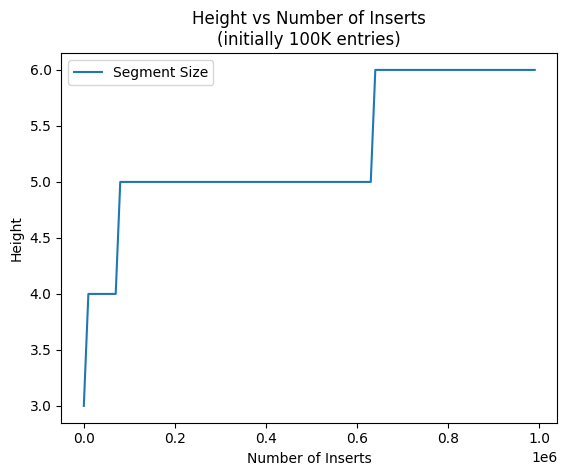

In [8]:
# Plot using matplotlib
plt.plot(x, height, label="Segment Size")
plt.xlabel("Number of Inserts")
plt.ylabel("Height")
plt.title("Height vs Number of Inserts\n(initially 100K entries)")
plt.legend()
plt.show()

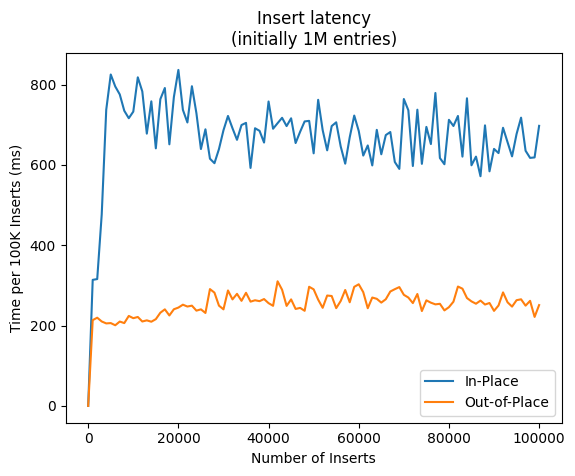

In [11]:
# Time experiment involving 1,000,000 initial rows + 100,000 inserts
time_df = pd.read_csv('inserts/time_inserts.csv', index_col=False)
x = np.array(time_df["num_inserts"].unique())
y_in_place = np.array(time_df[time_df["type"] == "in_place"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["time"])
y_out_of_place = np.array(time_df[time_df["type"] == "out_of_place"].groupby("num_inserts").mean(numeric_only=True).sort_values(by="num_inserts")["time"])
# Plot the above
plt.plot(x, y_in_place, label="In-Place")
plt.plot(x, y_out_of_place, label="Out-of-Place")
plt.xlabel("Number of Inserts")
plt.ylabel("Time per 10K Inserts (ms)")
plt.title("Insert latency\n(initially 1M entries)")
plt.legend()
plt.show()


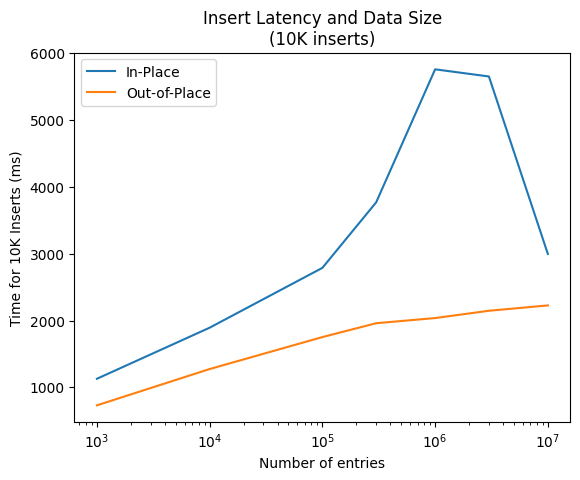

In [12]:
# Time experiment involving widely varied number of initial rows
mag_time_df = pd.read_csv('inserts/time_magnitude_inserts.csv', index_col=False)
x = np.array(mag_time_df["data_size"].unique())
y_in_place = np.array(mag_time_df[mag_time_df["type"] == "in_place"].groupby("data_size").mean(numeric_only=True).sort_values(by="data_size")["time"])
y_out_of_place = np.array(mag_time_df[mag_time_df["type"] == "out_of_place"].groupby("data_size").mean(numeric_only=True).sort_values(by="data_size")["time"])
# Plot the above
plt.plot(x, y_in_place, label="In-Place")
plt.plot(x, y_out_of_place, label="Out-of-Place")
plt.xlabel("Number of entries")
plt.ylabel("Time for 10K Inserts (ms)")
plt.xscale("log")
plt.legend()
plt.title("Insert Latency and Data Size\n(10K inserts)")
plt.show()